In [17]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import matplotlib
%matplotlib inline

In [18]:
results = pickle.load(open('scr_mk27/cepheid_data_5000.pkl', 'rb'))

In [19]:
results.keys()

dict_keys(['spectra', 'phases', 'radial_velocities', 'pulsation_velocities', 'template_spectrum'])

In [20]:
results['spectra'][0]

[Array([[27588.656, 34103.117],
        [27504.537, 34103.516],
        [27421.047, 34104.688],
        ...,
        [33655.836, 34245.26 ],
        [33659.832, 34250.742],
        [33655.035, 34247.33 ]], dtype=float32),
 Array([[27683.342, 34044.344],
        [27604.041, 34044.684],
        [27520.89 , 34041.043],
        ...,
        [33592.324, 34172.4  ],
        [33598.113, 34179.555],
        [33601.72 , 34184.59 ]], dtype=float32),
 Array([[27617.799, 33925.496],
        [27539.357, 33925.582],
        [27458.77 , 33925.723],
        ...,
        [33483.043, 34053.445],
        [33489.89 , 34061.543],
        [33489.457, 34062.418]], dtype=float32),
 Array([[27297.518, 33635.645],
        [27219.148, 33636.824],
        [27137.234, 33636.79 ],
        ...,
        [33213.883, 33770.63 ],
        [33215.28 , 33773.21 ],
        [33219.17 , 33778.28 ]], dtype=float32),
 Array([[26832.318, 33296.16 ],
        [26746.172, 33292.016],
        [26661.717, 33293.355],
        ...,
   

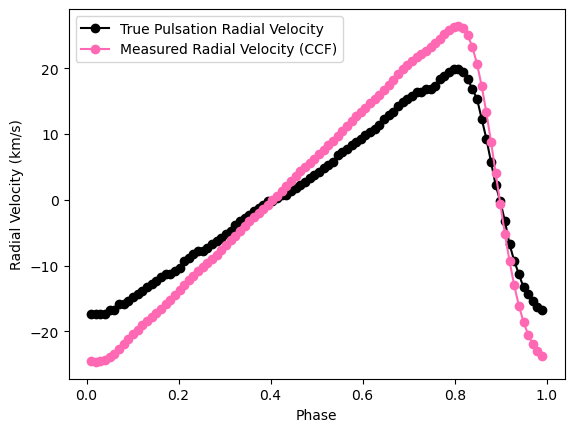

In [34]:
plt.plot(results['phases'][1:-1], results['radial_velocities'][3][1:-1],
         label='True Pulsation Radial Velocity', marker='o', color='black')
plt.plot(results['phases'][1:-1], results['pulsation_velocities'][1:-1],
         label='Measured Radial Velocity (CCF)', marker='o', color='hotpink')
plt.legend()
plt.xlabel('Phase')
plt.ylabel('Radial Velocity (km/s)')
plt.savefig('ccf_5000.png', dpi=300)
plt.show()

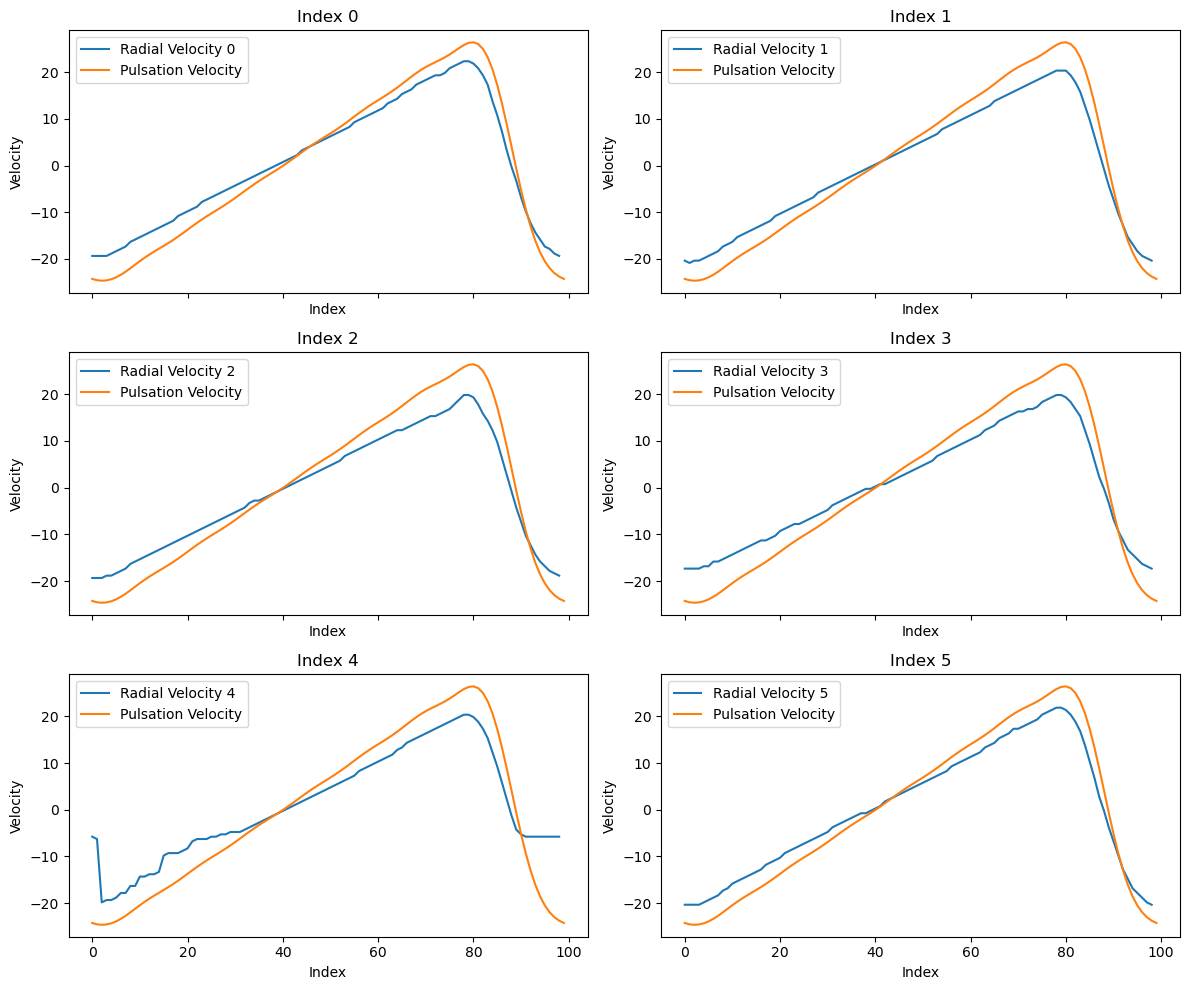

In [22]:


fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True)
axs = axs.flatten()
for i in range(6):
    axs[i].plot(results['radial_velocities'][i][1:], label=f'Radial Velocity {i}')
    axs[i].plot(results['pulsation_velocities'], label='Pulsation Velocity')
    axs[i].set_title(f'Index {i}')
    axs[i].legend()
    axs[i].set_ylabel('Velocity')
    axs[i].set_xlabel('Index')
plt.tight_layout()
plt.show()

In [23]:
np.nanmean(np.array([results['pulsation_velocities'][1:]/results['radial_velocities'][i][1:] for i in range(len(results['radial_velocities']))]), axis=1)

array([1.28911349, 1.30099856, 1.35649798, 1.48444308, 1.63272032,
       1.30419954])

1000: 1.35695448, 1.35117873, 1.96858364, 1.88058734, 1.32405204,
       1.31916901

20000: array([1.35695448, 1.35117873, 2.13148965, 1.88173014, 1.32405204,
       1.31916901])